In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [71]:
df = pd.read_csv("online_gaming_behavior_dataset.csv")
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [72]:
print(df.isnull().sum())

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [73]:
df['EngagementLevel'].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

<Axes: >

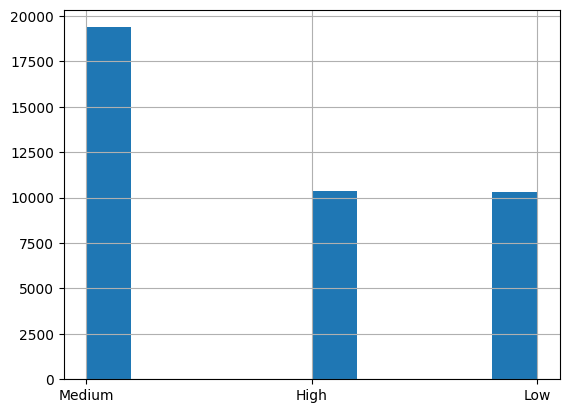

In [74]:
df['EngagementLevel'].hist()

In [ ]:
df = df.drop("PlayerID", axis=1)

In [ ]:
categorical_cols = ["Gender", "Location", "GameGenre", "GameDifficulty"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,Medium,False,True,...,True,False,False,False,False,False,True,False,False,True
1,29,5.525961,0,5,144,11,10,Medium,True,False,...,False,True,False,False,False,False,True,False,False,True
2,22,8.223755,0,16,142,35,41,High,True,False,...,False,True,False,False,False,True,False,True,False,False
3,35,5.265351,1,9,85,57,47,Medium,False,True,...,False,True,True,False,False,False,False,True,False,False
4,33,15.531945,0,2,131,95,37,Medium,False,True,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

le = LabelEncoder()
y = le.fit_transform(df["EngagementLevel"])

y = tf.keras.utils.to_categorical(y)

X = df.drop("EngagementLevel", axis=1)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

categories = list(le.classes_)
categories

Shape X: (40034, 21)
Shape y: (40034, 3)


['High', 'Low', 'Medium']

In [ ]:
df_corr = X.copy()
df_corr["EngagementLevel"] = np.argmax(y, axis=1) 

corr_matrix = df_corr.corr()["EngagementLevel"].sort_values(ascending=False)

print("Korrelationen mit der Zielvariable (EngagementLevel):")
print(corr_matrix)


Korrelationen mit der Zielvariable (EngagementLevel):
EngagementLevel              1.000000
AchievementsUnlocked         0.015576
PlayerLevel                  0.013185
Age                          0.007433
GameGenre_RPG                0.006309
GameDifficulty_Medium        0.004814
Gender_Male                  0.004110
Location_USA                 0.002875
GameGenre_Action             0.002785
GameDifficulty_Easy          0.001590
Location_Europe              0.000984
GameGenre_Strategy           0.000242
GameGenre_Sports            -0.000667
Location_Other              -0.000944
Location_Asia               -0.003928
Gender_Female               -0.004110
InGamePurchases             -0.005949
GameDifficulty_Hard         -0.007501
PlayTimeHours               -0.007644
GameGenre_Simulation        -0.008665
SessionsPerWeek             -0.249474
AvgSessionDurationMinutes   -0.293893
Name: EngagementLevel, dtype: float64


C:\Users\Timothy\AppData\Local\Temp\ipykernel_18096\1822176544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette="viridis")


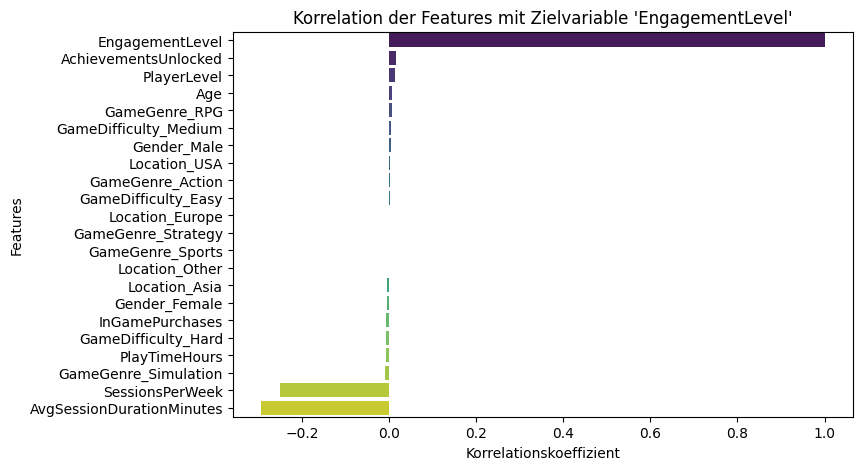

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette="viridis")
plt.title("Korrelation der Features mit Zielvariable 'EngagementLevel'")
plt.xlabel("Korrelationskoeffizient")
plt.ylabel("Features")
plt.show()


## NEW COMPARISON ## - Age vs EngagementLevel


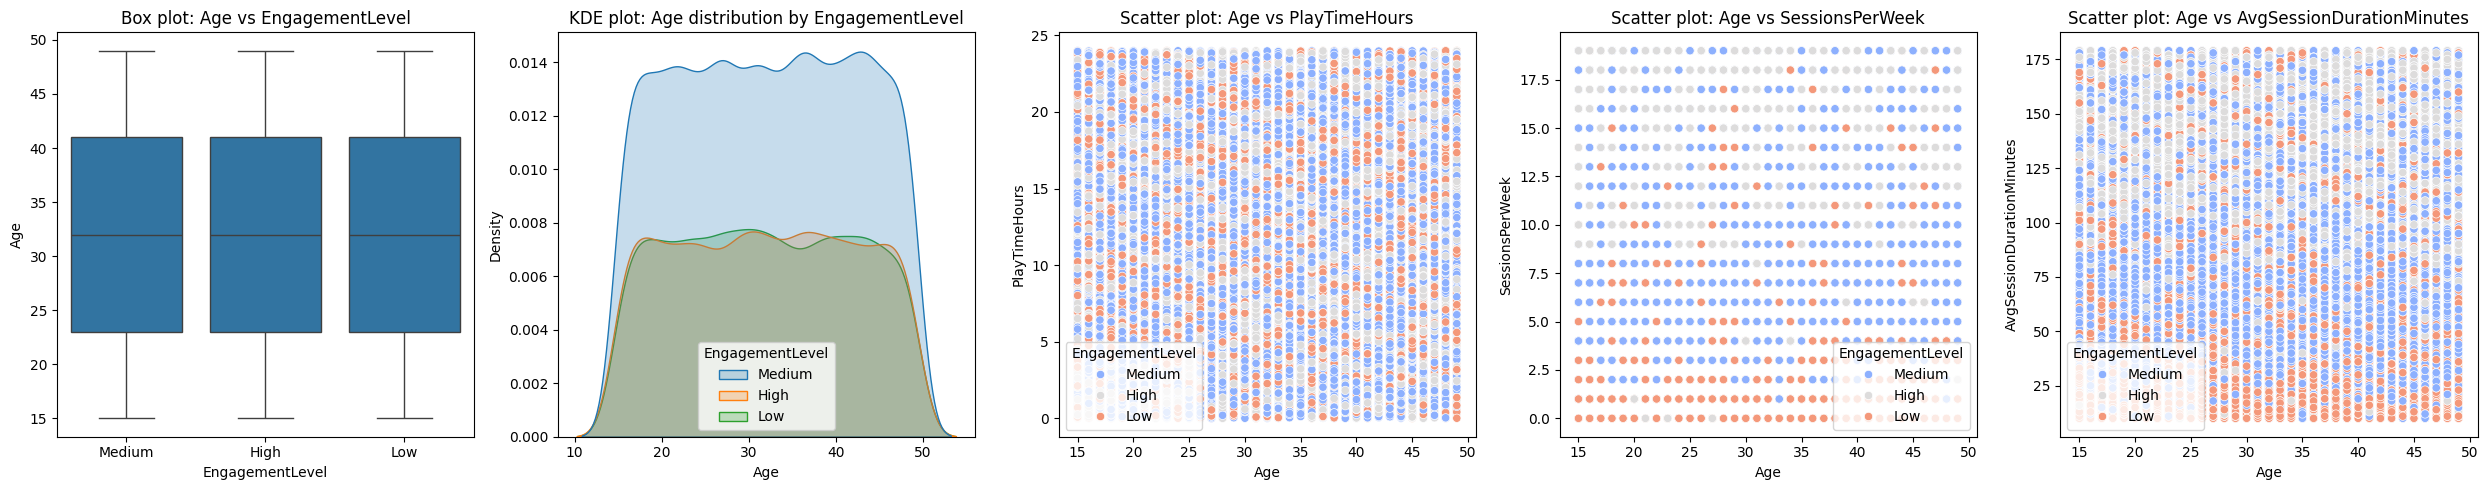

## NEW COMPARISON ## - PlayTimeHours vs EngagementLevel


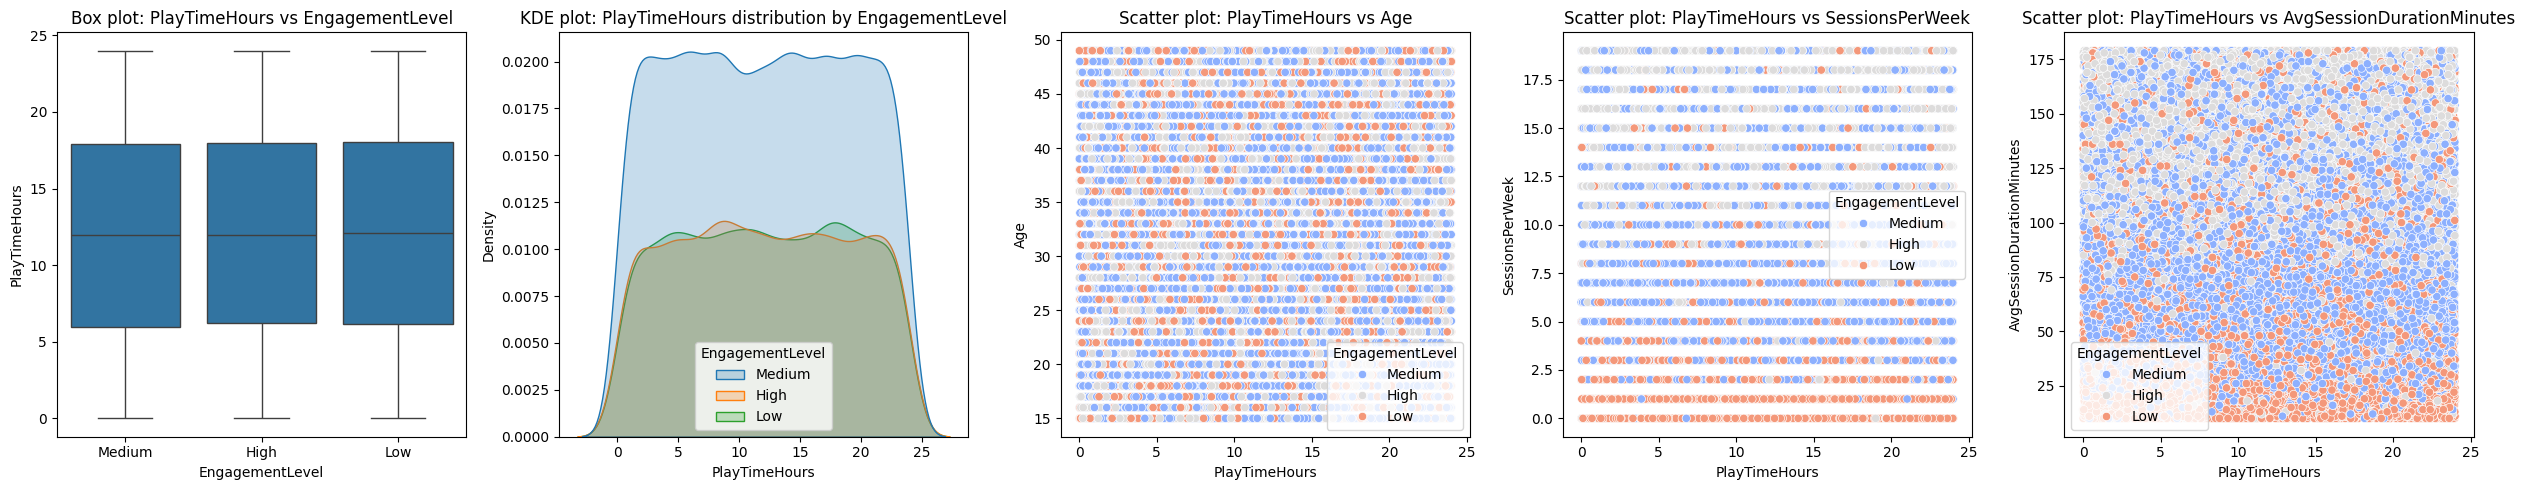

## NEW COMPARISON ## - SessionsPerWeek vs EngagementLevel


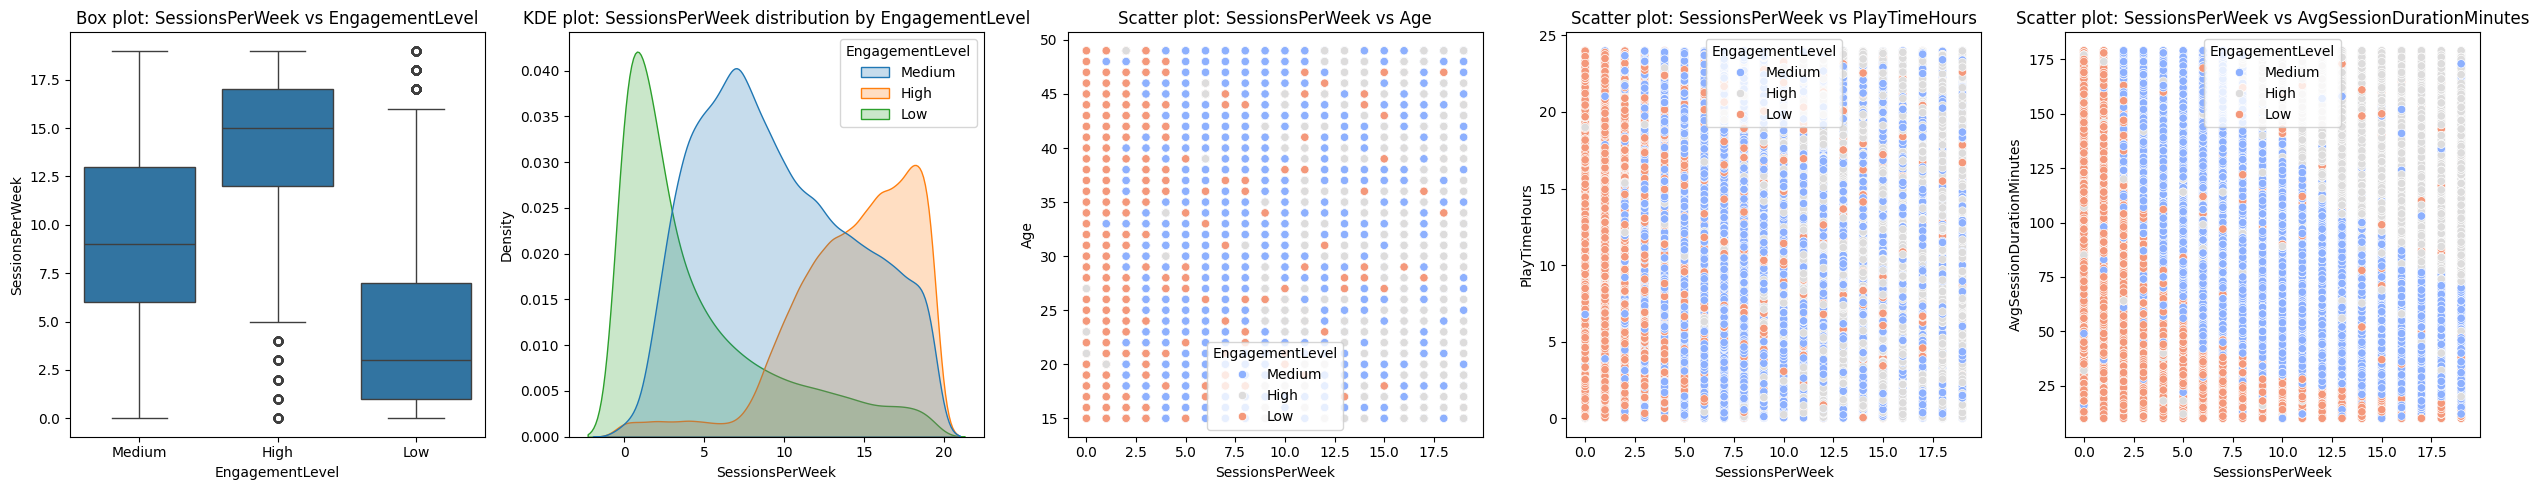

## NEW COMPARISON ## - AvgSessionDurationMinutes vs EngagementLevel


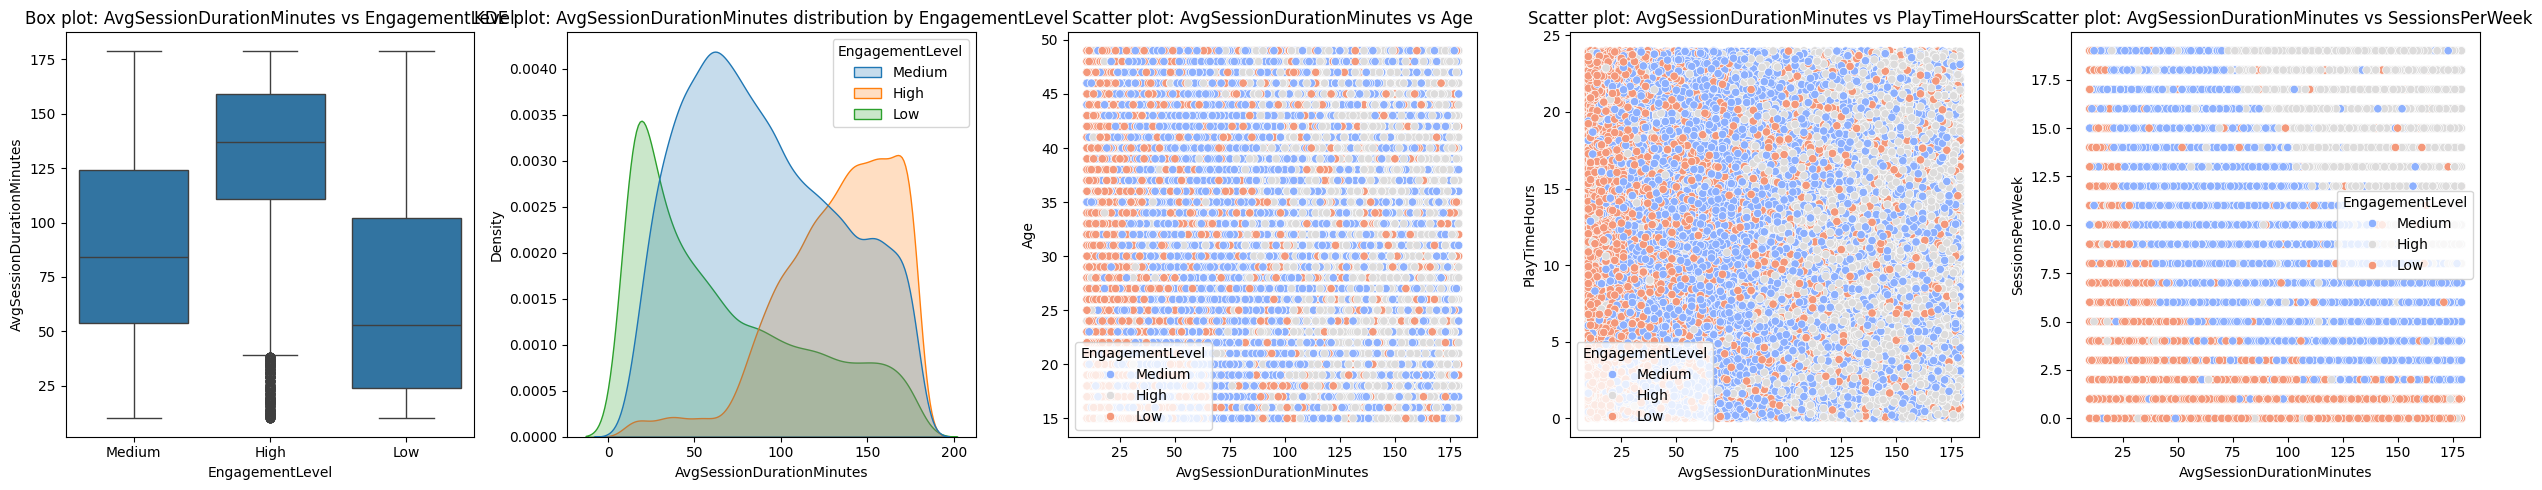

In [ ]:
suspected_columns = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']
target_variable = 'EngagementLevel'  

for feature in suspected_columns:
    print(f"## NEW COMPARISON ## - {feature} vs {target_variable}")
    
    num_other_features = len([col for col in suspected_columns if col != feature])
    
    fig, axes = plt.subplots(1, 2 + num_other_features, figsize=(5 * (2 + num_other_features), 5))
    
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[0])
    axes[0].set_title(f'Box plot: {feature} vs {target_variable}')
    
    sns.kdeplot(x=feature, hue=target_variable, data=df, fill=True, ax=axes[1])
    axes[1].set_title(f'KDE plot: {feature} distribution by {target_variable}')
    
    for i, other_feature in enumerate([col for col in suspected_columns if col != feature]):
        sns.scatterplot(x=feature, y=other_feature, hue=target_variable, data=df, palette="coolwarm", ax=axes[i+2])
        axes[i+2].set_title(f'Scatter plot: {feature} vs {other_feature}')
    
    plt.tight_layout()
    plt.show()


In [81]:
df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,Medium,False,True,...,True,False,False,False,False,False,True,False,False,True
1,29,5.525961,0,5,144,11,10,Medium,True,False,...,False,True,False,False,False,False,True,False,False,True
2,22,8.223755,0,16,142,35,41,High,True,False,...,False,True,False,False,False,True,False,True,False,False
3,35,5.265351,1,9,85,57,47,Medium,False,True,...,False,True,True,False,False,False,False,True,False,False
4,33,15.531945,0,2,131,95,37,Medium,False,True,...,False,False,True,False,False,False,False,False,False,True


In [82]:
df.shape

(40034, 22)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

X_chi = np.abs(X.copy())

chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_chi, y.argmax(axis=1))  

chi2_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Score": chi2_selector.scores_
}).sort_values(by="Chi2_Score", ascending=False)

print(chi2_scores)

                      Feature     Chi2_Score
4   AvgSessionDurationMinutes  240139.967986
3             SessionsPerWeek   51588.583264
5                 PlayerLevel    3540.413351
6        AchievementsUnlocked    1976.663723
1               PlayTimeHours      14.504671
0                         Age       9.504930
14              GameGenre_RPG       3.199051
15       GameGenre_Simulation       2.665296
17         GameGenre_Strategy       2.400975
2             InGamePurchases       2.382573
19        GameDifficulty_Hard       1.806217
20      GameDifficulty_Medium       1.731063
9               Location_Asia       1.257249
10            Location_Europe       1.085010
7               Gender_Female       0.706685
18        GameDifficulty_Easy       0.636009
12               Location_USA       0.612638
11             Location_Other       0.602175
8                 Gender_Male       0.474141
13           GameGenre_Action       0.328501
16           GameGenre_Sports       0.017395


                      Feature  Fisher_Score
3             SessionsPerWeek  11625.820363
4   AvgSessionDurationMinutes   6207.332076
6        AchievementsUnlocked    117.077338
5                 PlayerLevel    108.126205
14              GameGenre_RPG      1.996041
1               PlayTimeHours      1.823976
15       GameGenre_Simulation      1.664587
0                         Age      1.507412
17         GameGenre_Strategy      1.500853
2             InGamePurchases      1.490699
20      GameDifficulty_Medium      1.236493
19        GameDifficulty_Hard      1.128907
9               Location_Asia      0.787922
10            Location_Europe      0.774808
18        GameDifficulty_Easy      0.635918
7               Gender_Female      0.590386
8                 Gender_Male      0.590386
12               Location_USA      0.510218
11             Location_Other      0.333888
13           GameGenre_Action      0.205507
16           GameGenre_Sports      0.010885


C:\Users\Timothy\AppData\Local\Temp\ipykernel_18096\370525442.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fisher_Score", y="Feature", data=fisher_scores, palette="mako")


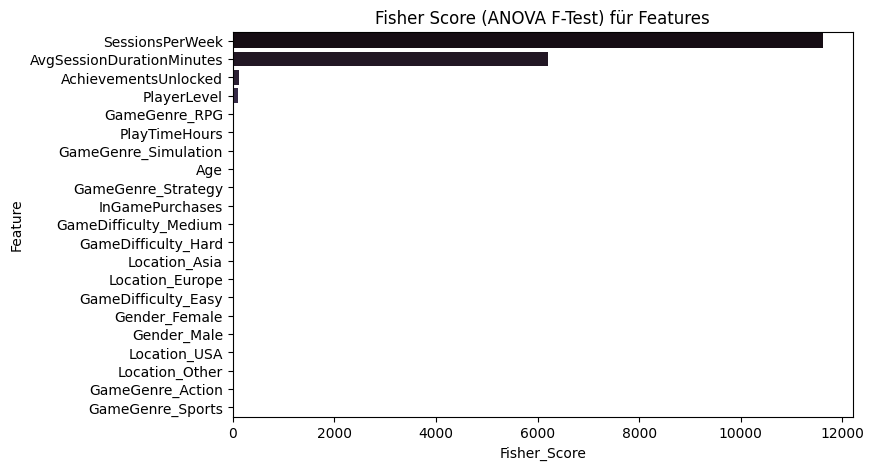

In [ ]:
from sklearn.feature_selection import f_classif

fisher_selector = SelectKBest(score_func=f_classif, k="all")
fisher_selector.fit(X, y.argmax(axis=1))  

fisher_scores = pd.DataFrame({
    "Feature": X.columns,
    "Fisher_Score": fisher_selector.scores_
}).sort_values(by="Fisher_Score", ascending=False)

print(fisher_scores)

plt.figure(figsize=(8,5))
sns.barplot(x="Fisher_Score", y="Feature", data=fisher_scores, palette="mako")
plt.title("Fisher Score (ANOVA F-Test) für Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y.argmax(axis=1)
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp.argmax(axis=1)
)

print("Trainingsdaten:", X_train.shape)
print("Validierungsdaten:", X_val.shape)
print("Testdaten:", X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


Trainingsdaten: (28023, 21)
Validierungsdaten: (6005, 21)
Testdaten: (6006, 21)


In [86]:
df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,Medium,False,True,...,True,False,False,False,False,False,True,False,False,True
1,29,5.525961,0,5,144,11,10,Medium,True,False,...,False,True,False,False,False,False,True,False,False,True
2,22,8.223755,0,16,142,35,41,High,True,False,...,False,True,False,False,False,True,False,True,False,False
3,35,5.265351,1,9,85,57,47,Medium,False,True,...,False,True,True,False,False,False,False,True,False,False
4,33,15.531945,0,2,131,95,37,Medium,False,True,...,False,False,True,False,False,False,False,False,False,True


In [ ]:
from keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model_gaming_2 = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  
    layers.BatchNormalization(),

    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    layers.Dense(32, activation="relu"),
    
    layers.Dense(len(categories), activation="softmax")
])

model_gaming_2.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc", multi_label=True)]
)

model_gaming_2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,335 (52.09 KB)

 Trainable params: 13,293 (51.93 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1)
checkpoint = ModelCheckpoint("best_model_gaming.keras", monitor="val_loss", save_best_only=True)

history = model_gaming_2.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6923 - auc: 0.8421 - loss: 0.8354 - val_accuracy: 0.8445 - val_auc: 0.9253 - val_loss: 0.6056 - learning_rate: 0.0010
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - auc: 0.9087 - loss: 0.6270 - val_accuracy: 0.8806 - val_auc: 0.9377 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - auc: 0.9212 - loss: 0.5640 - val_accuracy: 0.8914 - val_auc: 0.9409 - val_loss: 0.4733 - learning_rate: 0.0010
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8375 - auc: 0.9248 - loss: 0.5373 - val_accuracy: 0.8963 - val_auc: 0.9418 - val_loss: 0.4495 - learning_rate: 0.0010
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - auc: 0.9283 - loss: 0.5117 - val_accuracy: 0.8831 - val_auc: 0.9408 - val_loss: 0.4485 - learning_rate: 0.0010
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - a

<Axes: >

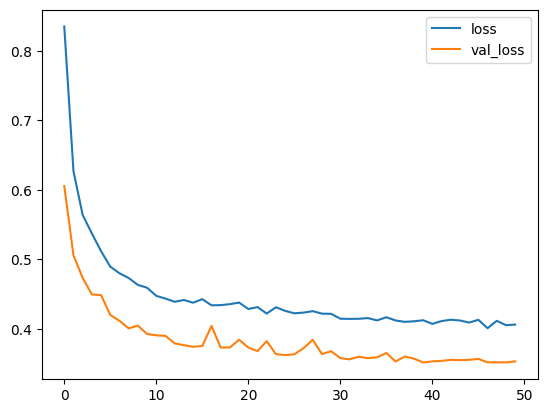

In [89]:
loss_df = pd.DataFrame(model_gaming_2.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

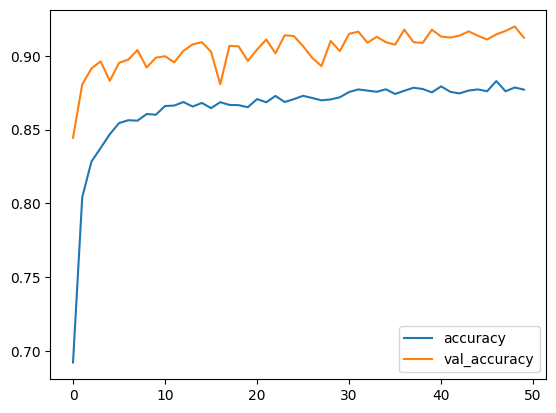

In [90]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [91]:
from tensorflow.keras.models import load_model
best_trained_model = load_model("best_model_gaming.keras")

In [92]:
print("Test data evaluation:")
print(best_trained_model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(best_trained_model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.3572256565093994, 0.9159173965454102, 0.9432236552238464]

Train data evaluation:
[0.34716883301734924, 0.9205295443534851, 0.9463184475898743]


In [ ]:
y_pred_proba = best_trained_model.predict(X_test)

test_predictions = np.argmax(y_pred_proba, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

print("Beispiel Wahrscheinlichkeiten:\n", y_pred_proba[:5])
print("Beispiel Predictions:", test_predictions[:5])
print("Beispiel Ground Truth:", y_test_classes[:5])


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Beispiel Wahrscheinlichkeiten:
 [[0.02850533 0.04738705 0.9241076 ]
 [0.03601491 0.11395386 0.85003126]
 [0.03654839 0.03127451 0.932177  ]
 [0.03285908 0.03063679 0.93650407]
 [0.28999045 0.0547559  0.65525365]]
Beispiel Predictions: [2 2 2 2 2]
Beispiel Ground Truth: [2 2 2 2 2]


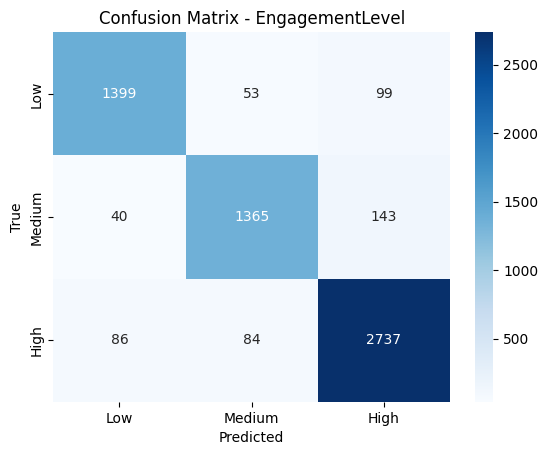

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, test_predictions)

sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - EngagementLevel")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test_classes, test_predictions, 
                            target_names=["Low", "Medium", "High"]))

acc = accuracy_score(y_test_classes, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))


              precision    recall  f1-score   support

         Low       0.92      0.90      0.91      1551
      Medium       0.91      0.88      0.90      1548
        High       0.92      0.94      0.93      2907

    accuracy                           0.92      6006
   macro avg       0.91      0.91      0.91      6006
weighted avg       0.92      0.92      0.92      6006


Model overall accuracy: 91.59%


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("ROC-AUC Score: {:.4f}".format(auc))


ROC-AUC Score: 0.9434


In [97]:
X.columns

Index(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'Gender_Female', 'Gender_Male', 'Location_Asia', 'Location_Europe',
       'Location_Other', 'Location_USA', 'GameGenre_Action', 'GameGenre_RPG',
       'GameGenre_Simulation', 'GameGenre_Sports', 'GameGenre_Strategy',
       'GameDifficulty_Easy', 'GameDifficulty_Hard', 'GameDifficulty_Medium'],
      dtype='object')

In [98]:
X.head(3)

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Female,Gender_Male,Location_Asia,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,False,True,False,...,True,False,False,False,False,False,True,False,False,True
1,29,5.525961,0,5,144,11,10,True,False,False,...,False,True,False,False,False,False,True,False,False,True
2,22,8.223755,0,16,142,35,41,True,False,False,...,False,True,False,False,False,True,False,True,False,False


In [ ]:
tester_row = {
    'Age': 25,
    'PlayTimeHours': 18.5,             
    'InGamePurchases': 2,              
    'SessionsPerWeek': 12,             
    'AvgSessionDurationMinutes': 90,   
    'PlayerLevel': 35,                
    'AchievementsUnlocked': 50,        
    'Gender_Female': 0,
    'Gender_Male': 1,
    'Location_Asia': 0,
    'Location_Europe': 1,
    'Location_Other': 0,
    'Location_USA': 0,
    'GameGenre_Action': 1,
    'GameGenre_RPG': 0,
    'GameGenre_Simulation': 0,
    'GameGenre_Sports': 0,
    'GameGenre_Strategy': 0,
    'GameDifficulty_Easy': 0,
    'GameDifficulty_Hard': 0,
    'GameDifficulty_Medium': 1
}

tester_df = pd.DataFrame([tester_row])

tester_scaled = scaler.transform(tester_df)

proba = best_trained_model.predict(tester_scaled)

pred_class = np.argmax(proba)
class_names = ["Low", "Medium", "High"]

print(f"Predicted Engagement Level: {class_names[pred_class]}")
print("Wahrscheinlichkeiten pro Klasse:", proba)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Engagement Level: High
Wahrscheinlichkeiten pro Klasse: [[0.04003157 0.03010598 0.92986256]]
